In [1]:
import sys
sys.path += [".."]

In [2]:
import rebound
import numpy as np
from scipy.special import erf

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [3]:
from smbh import *

# Constants

In [9]:
p = 1e-6
v = 60

ps = sphericalToCartesian(p, np.pi / 4, np.pi / 4)
vs = sphericalToCartesian(v, np.pi / 4, np.pi / 4)

constants.setDarkMatterScaleRadius(1)
constants.SCALE_LENGTH = 0.1

constants.SOFTENING_RADIUS = 1e-5
constants.SOFTENING_SPEED = 1e-5

# Gravitational potential only

In [5]:
sim = setupSimulation(1, ps, vs, gravitational_only, velocity_dependent = 0)
sim.dt = 1e-6
sim.gravity = 'none'
sim.integrator = 'leapfrog'
times_g, positions_g, speeds_g = runSimulation(sim, 10000)

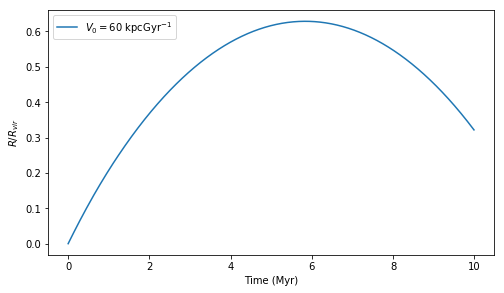

In [6]:
fig, ax = plotDistance(times_g, positions_g)
ax.legend(["$V_0 = %d$ kpcGyr$^{-1}$"%v])

# fig.savefig("gravitational_only.png", dpi = 300)
plt.show()

# DM dynamical friction

integrators = 
- 'ias15' (default)
- 'whfast'
- 'sei'
- 'leapfrog'
- 'janus'
- 'mercurius'
- 'bs'
- 'none'

In [10]:
sim = setupSimulation(1, ps, vs, gravitational_DF)

sim.t = 0
sim.dt = 1e-6
sim.integrator = 'leapfrog'

n = int(0.05 // sim.dt)
print(n)
times_df, positions_df, speeds_df = runSimulation(sim, n)

50000


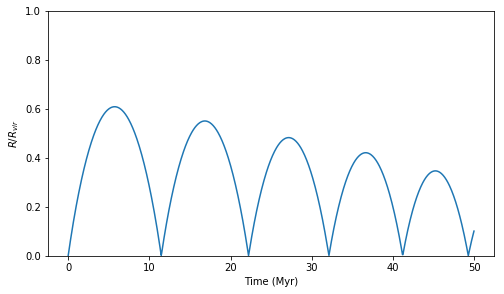

In [11]:
fig, ax = plotDistance(times_df, positions_df)
# fig, ax = plotDistance(times_df, np.log10(abs(positions_df)))

ax.set_ylim(0, 1)
# ax.set_xlim(12, 25)
# ax.set_ylim(7.4, 7.5)
# fig.savefig("500 Myr.png", dpi = 300)
plt.show()

In [70]:
constants.SMBH_MASS, constants.SOFTENING_RADIUS, constants.SOFTENING_SPEED

(2.203536890197032, 1e-06, 1e-06)

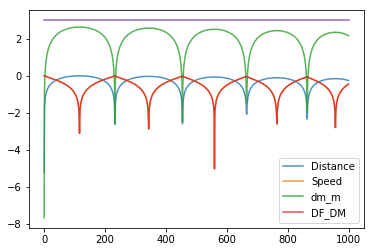

In [64]:
df_dm = np.linalg.norm(dynamicalFrictionDM(positions_df, speeds_df), axis = 1)
df_g = np.linalg.norm(dynamicalFrictionGas(positions_df, speeds_df), axis = 1)

v = np.linalg.norm(speeds_df, axis = 1)
r = np.linalg.norm(positions_df, axis = 1)

df_dm *= 1 / max(df_dm)
df_g *= 1 / max(df_g)

dm_m = darkMatterMass(r)

v *= 1 / max(v)
r *= 1 / max(r)

datas = [r, v, dm_m, df_dm, df_g]
labels = ['Distance', 'Speed', 'dm_m', 'DF_DM', 'DF_G']

for i in range(4):
    plt.plot(np.log10(datas[i]), label = labels[i], alpha = 0.8)
plt.plot([0, 999], np.log10([constants.HALO_MASS, constants.HALO_MASS]))
plt.legend()
plt.show()

In [46]:
forces = [baseCase(positions_df[i], speeds_df[i]) for i in range(1000)] 

In [47]:
plt.plot(times_df[1:] * 1000, np.linalg.norm(forces, axis = 1)[1:])
# plt.ylim(0, 1000)

# STOP

In [ ]:
rs = sphericalToCartesian(1e-3, 0, 0)

Vs = [280, 281]

times = []
positions = []
speeds = []

for vs in Vs:
    vs = sphericalToCartesian(vs, np.pi / 4, np.pi / 4)
    sim, particle = setupSimulation(1, rs, vs, gravitational_DM_DF)
    t, p, s = runSimulation(sim, particle, 2000)
    times.append(t)
    positions.append(p)
    speeds.append(s)

In [ ]:
fig, ax = plotDistance(times[0], positions[0])
fig, ax = plotDistance(times[1], positions[1], ax = ax)

ax.legend(["$V_0 = 280$ kpcGyr$^{-1}$",
           "$V_0 = 281$ kpcGyr$^{-1}$"])
plt.show()

In [29]:
erf(10)

1.0